In [1]:
import os, sys
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
sys.path.append('.')
from ddpm.data import get_two_dim_ds
from ddpm.models.utils import get_mlpnet
from ddpm.train import train
from ddpm.diffusion import Diffusion

# Config

In [3]:
learning_rate = 1e-3
batch_size = 128
num_iterations = 10**4
N =30
device='cuda'

# Init Objects

In [4]:
diffusion = Diffusion(N=30).to(device)
model  = get_mlpnet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

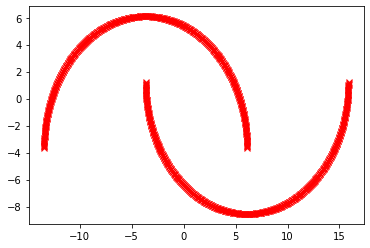

In [5]:
ds = get_two_dim_ds(1000, 'moon', device)
x = ds.tensors[0].cpu().numpy()
plt.plot(x[:,0], x[:, 1], 'rx')
dataloader = DataLoader(ds, batch_size=batch_size, drop_last=True)

# Train

In [6]:
train(model, diffusion, optimizer, dataloader, num_iterations=num_iterations, device=device)

100%|██████████| 10000/10000 [00:56<00:00, 177.66it/s]


# Plot

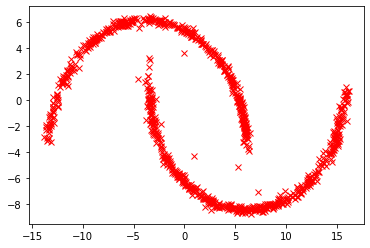

In [8]:
x_T = torch.randn((1000,2), device=device)

x_0, x_mean = diffusion.reverse_sample(x_T, model)
plot_x = x_mean.cpu().detach().numpy()
plt.plot(plot_x[:,0], plot_x[:,1], 'rx')